Before starting to work with the data file, always familiarize yourself with what you are working with.

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the data set.
survey_data = pd.read_csv(r'C:\Users\patri\Desktop\LSE_CareerAccelerator\Course 3\Week 3\Data\Vision_Zero_Safety.csv')

# View the data.
survey_data.shape

(5591, 11)

### Interpretation

We have a decent sample size, on an opinion research we have quite a number. However we don't know who has filled out the  survey, it could be that participants have strong positive or negative opinions on the matter but we don't have the information. Large samples do not guarantee representatitveness. 

## Preprocessing

We will start with removing rows where there are no data we can analyze

In [2]:
# Check how many empty values we have
survey_data['COMMENTS'].isna().sum()

651

In [3]:
# Remove the blank values in the column section.
survey_data.dropna(subset = ['COMMENTS'], inplace = True)
survey_data.shape

(4940, 11)

### Interpretation

While we now have a cleaner dataset we should normalize the data. In case there are different variation of words, this would falsify our analysis. Car or car would appear as two words so we need to standardize the case for all words, if the same words occur python would not treat it as two different words. 

In [4]:
# Transform data to lowercase. We will use the lambda function to convert each word in the comments column to lowercase. 
# The function extracts each word with the split and then performs the lower function on the word. 
# It then join method to add the transformed word back into the original column.
survey_data['COMMENTS'] = survey_data['COMMENTS'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# Preview the result
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                 illegal u-turns here
2    there is no walk sign on this intersection so ...
3    constant issue; mpd never enforces despite rep...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

Not yet done with the preprocessing, we will now remove the soecial characters and punctuations with blanks

In [5]:
# Remove the punctuation
survey_data['COMMENTS'] = survey_data['COMMENTS'].str.replace('[^\w\s]','')
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                  illegal uturns here
2    there is no walk sign on this intersection so ...
3    constant issue mpd never enforces despite repe...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

It may be possible that the respondents submitted two or more responses for whatever reason, we can remove them as well as part of the data pre-processing workflow

In [6]:
survey_data.COMMENTS.duplicated().sum()

282

In [7]:
# While there are not a huge number of duplicates it is still recommended to remove them.
survey = survey_data.drop_duplicates(subset = ['COMMENTS'])
survey.reset_index(inplace = True)
survey.head()

,index,X,Y,OBJECTID,GLOBALID,REQUESTID,USERTYPE,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS
0,0,-77.020315,38.892890,1,{7AA2347A-C035-4D5A-9196-07C309B4C7BF},1,Pedestrian,Blocking the crosswalk,2015/06/29 19:56:00+00,Unassigned,10022.0,cars for valet at the capital grille constantl...
1,1,-77.020877,38.893046,2,{1AFF4069-5D94-49A1-9D1F-0A089D414F5F},2,Pedestrian,Other Driving Issue,2015/06/29 19:57:36+00,Unassigned,10022.0,illegal uturns here
2,2,-77.024643,38.918125,3,{908CCF07-A389-40EE-B5D2-7ADAF90404D1},3,Pedestrian,Not enough time to cross,2015/06/29 20:14:32+00,Unassigned,10396.0,there is no walk sign on this intersection so ...
3,3,-77.003515,38.896124,4,{12E7A594-76F9-41CE-91AC-9B6B8E08EC5C},4,Pedestrian,Stop sign running,2015/06/29 20:15:02+00,Unassigned,4381.0,constant issue mpd never enforces despite repe...
4,4,-77.017562,38.883266,5,{0AED48A8-A4DD-44E9-8C4A-D45E14E7462D},5,Biker,Cyclist behavior,2015/06/29 20:15:05+00,Unassigned,5344.0,some cyclists often run this red light


In [8]:
# We can now visualize the frequency of the words by creating a word cloud. 
# We'll start by creating an empty string variable and assign the value '' so we can pass a loop to iterate all the comments
all_comments = ''

# Iterate through the entire length of the dataframe
for i in range(survey.shape[0]):
    # Add each comment into the variable we just created. Use i to specify the row number to be added to each item.
    all_comments = all_comments + survey['COMMENTS'][i]

In [9]:
# Install WordCloud in case it is not there yet.
!pip install WordCloud

In [10]:
# Import the wordcloud class from the library.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Set the color palette
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(all_comments)

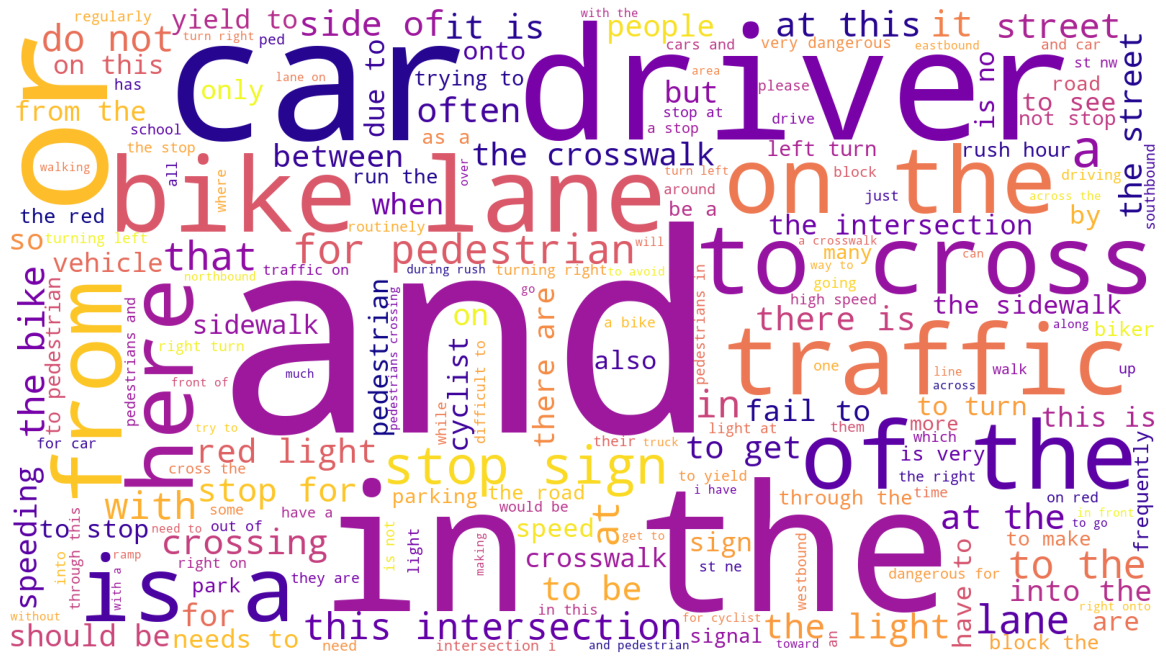

In [12]:
# Plot the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### Interpretation

While we did create a cool word cloud there is still some work to do. There are a lot of words that are not adding a lot of meaning. 'In' 'and' 'the' are features a lot of times and are quite dominant in this illustration. We need to refine the process and leverage the NLTK library to then remove the words.

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Tokenize the words. Tokens are sequence of characters in the column.
survey['tokens'] = survey['COMMENTS'].apply(word_tokenize)
# Preview the result.
survey['tokens'].head()

0    [cars, for, valet, at, the, capital, grille, c...
1                              [illegal, uturns, here]
2    [there, is, no, walk, sign, on, this, intersec...
3    [constant, issue, mpd, never, enforces, despit...
4       [some, cyclists, often, run, this, red, light]
Name: tokens, dtype: object

In [15]:
# Now we need to bring the tokens into a single list to maximize the efficiency in preprocessing the data
# Define an empty list
all_tokens = []
for i in range(survey.shape[0]):
    # Add each token to the list and specify i to indicate the row number for each comment
    all_tokens = all_tokens + survey['tokens'][i]

In [16]:
# Now we will import the FreqDist to calculate the frequency distribution of all the tokens
from nltk.probability import FreqDist
# Calculate the frequency distribution in the list of all words from all_tokens list containing all the words
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 5567, 'to': 4358, 'and': 3122, 'a': 2298, 'on': 2161, 'is': 1999, 'of': 1908, 'cars': 1856, 'this': 1698, 'for': 1517, ...})

In [17]:
# If we were concerned with the punctuation characters we can elimitate the words that are neither alphabet or numbers. 
# This code looks if the word is a letter or number and if that is true it will add it to the tokens1 object
tokens1 = [word for word in all_tokens if word.isalnum()]

In [18]:
# Now we still have the stop words since they are super dominant and don't convey meaningful information
# Including these words the relevant words would be downplayed. 
# Download the stop words if you don't have it installed yet: nltk.download('stopwords')
from nltk.corpus import stopwords
# Create a set of English stop words
english_stopwords = set(stopwords.words('english'))
# Create a filtered list of tokens without stop words. It iterates through the first tokens list if the current x word is not a stopword set
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
# Define an empty string variable
tokens2_string = ''
for value in tokens2:
    # Add filtered token word to the string and add a space between the strings.
    tokens2_string = tokens2_string + value + ' '

Now we can generate the word cloud again and compare it with the initial word cloud

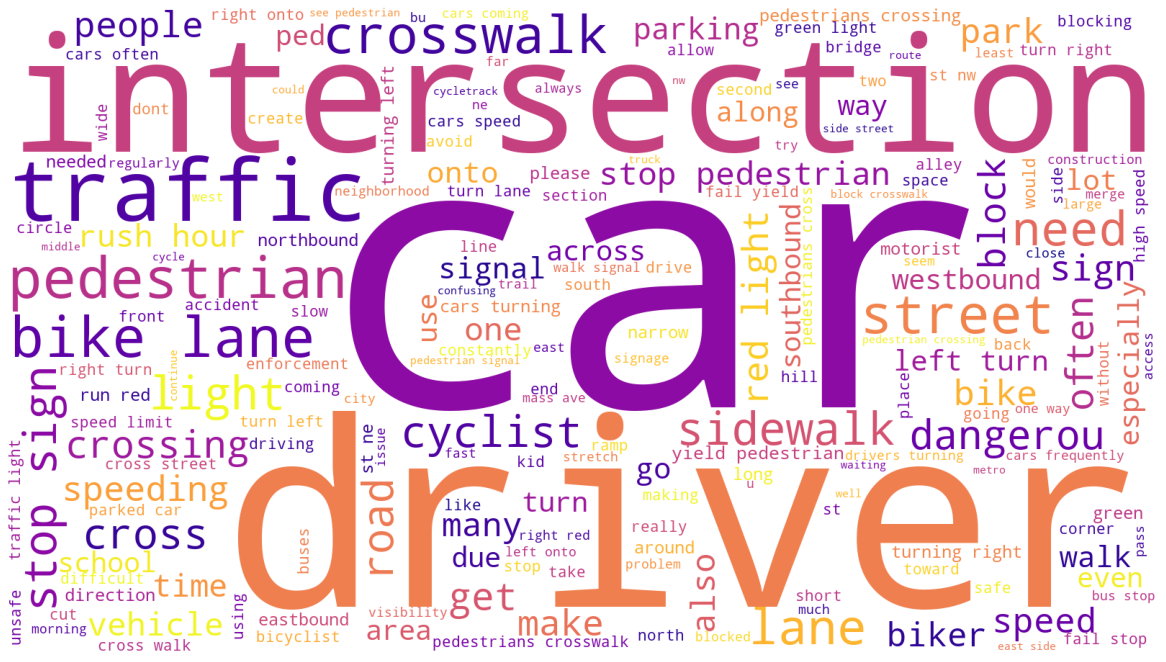

In [19]:
# Set the color palette
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(tokens2_string)

# Plot the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### Interpretation

Good stuff, we can see the words based on how relevant they are (frequency) but we might want to know how often in number they were mentioned in the comments.

In [20]:
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'cars': 1856, 'pedestrians': 1143, 'street': 1056, 'drivers': 1009, 'lane': 992, 'stop': 983, 'traffic': 976, 'bike': 817, 'intersection': 810, 'light': 797, ...})

In [21]:
# Present the data in a more readable format. We can import the counter class method  to count the outputs in a DataFrame
from collections import Counter
# Generate a DataFrame from Counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')

# Display the result
counts

,Frequency
Word,
cars,1856
pedestrians,1143
street,1056
drivers,1009
lane,992
stop,983
traffic,976
bike,817
intersection,810


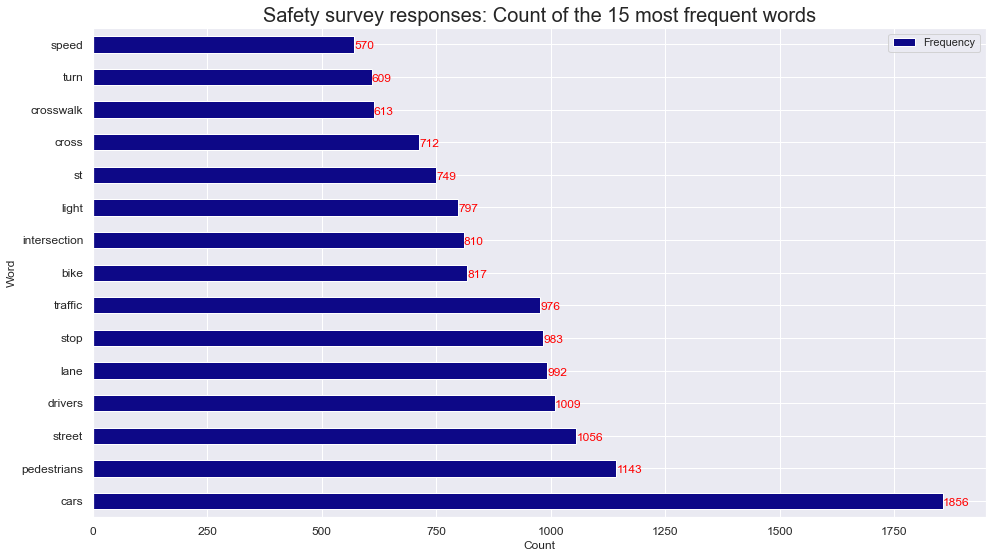

In [22]:
# Since we want to be more effective with visualization technique. 

# Create an object called ax to plot the dataframe
ax = counts.plot(kind = 'barh', figsize = (16, 9), fontsize = 12, colormap = 'plasma')
# Set the labels
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Word', fontsize = 12)
ax.set_title('Safety survey responses: Count of the 15 most frequent words', fontsize = 20)
# Draw the bar labels. i represents each bar in the chart. 
# The get_width statement is applying the width for each of the bar and rounds the number to two decimal points
for i in ax.patches:
    ax.text(i.get_width() + .41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'red')

### Interpretation

We need to decide ourselves which is the most insightful but we can see that the emphasis in the preprocessing of the data lies in duplicates and removed punctuations. 

What did we achieve? 

The survey wanted to check the concerns of respondents. We get an exploratory analysis and initial lines of inquiry for further research. We could further segment the responses based on the uer types (pedestrians, bikers, cars...) A useful exercise to generate the wordclouds and how to clean the data. 

# Exploring polarity, named entities and document term matrices

In [25]:
# Let's explore how to estimate sentiment in comments using the TextBlob library

# Install TextBlob in case it is not yet installed: !pip install textblob

# Import the nessecary packages
from textblob import TextBlob

Let's first understand how textblob identifies the polarity and subjectivity of a statement. 
* Sentiment polarity scores are assigned on a range where -1 is the lowest and +1 the highest possible score. 
* Subjectivity ranges from 0 to 1 where 0  means all fact based and objective while 1 means opinion based and subjective. 

In [27]:
# let's test it on some sample sentences
TextBlob('My cute little rabbit loves to eat the food I prepare, I love how it tickes when it eats from my hand').sentiment

Sentiment(polarity=0.2708333333333333, subjectivity=0.7000000000000001)

In [33]:
TextBlob('That awful rodent got into the garden and destroyed everything').sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [34]:
TextBlob('Ricky’s presence immediately inspired those two young men on the bench\
to go back to the drawing board and start from scratch, great stuff!').sentiment

Sentiment(polarity=0.3666666666666667, subjectivity=0.3833333333333333)

These three examples show a range of sentiments from extremely negative to rather positive ones. Subjectivity is closer to subjective based opinon statements. 

### Extract polarity and subjectivity from survey comments

We will now calculate the sentiment polarity score for each comment in the data set

In [38]:
# Define a gfunction that takes a comment variable as an argument. We will use the function to return the output of TextBlob
def generate_polarity(comment):
    # Check the first item of the sentiment method output
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment
survey['Polarity'] = survey['COMMENTS'].apply(generate_polarity)

# Preview the result
survey['Polarity'].head()

0    0.000000
1   -0.500000
2    0.233333
3    0.000000
4    0.200000
Name: Polarity, dtype: float64

### Interpretation
The code worked, we can extract the polarity score for each comment. Let's now do the same for the sentiment scores. This works almost the same by first defining the function and then pass it through each item in the comment column

In [39]:
# Define a function to extract the subjectivity score from the comment
def generate_subjectivity(comment):
    # Check the sentiment of the second item of the sentiment method output
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment
survey['Subjectivity'] = survey['COMMENTS'].apply(generate_subjectivity)

# Preview the result
survey['Subjectivity'].head()

0    0.333333
1    0.500000
2    0.500000
3    0.333333
4    0.350000
Name: Subjectivity, dtype: float64

### Interpretation

The function worked by extracting the relevant score from sentiment method for each comment. What can we deduce from the sentiment method?

## Visualize the sentiment polarity scores on a histogram

If we want to see if the comments are biased to a strong sentiment score we should use a histogram. This approach gives us a general sense of what the citizens feel about street safety.

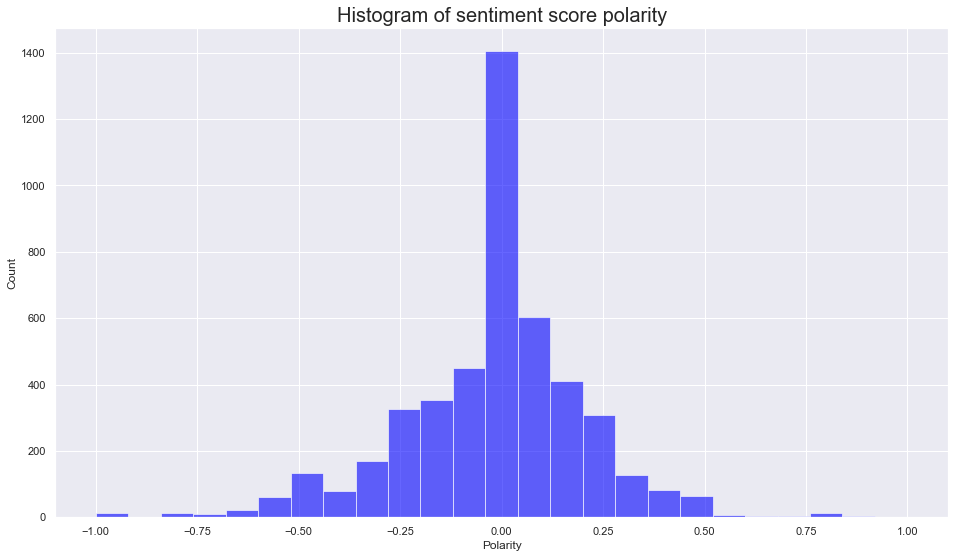

In [42]:
# Set the number of bins
num_bins = 25

# Set the plot area
plt.figure(figsize = (16, 9))

# Define the bars
n, bins, patches = plt.hist(survey['Polarity'], num_bins, facecolor = 'blue', alpha = 0.6)

# Set the labels
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity', fontsize = 20)

plt.show()

### Interpretation

Most values are in the 0 polarity, meaning not negative nor positive. How can we test where a comment that contains both positive and negative scores is allocated? Use a few samples from the comments file.

In [43]:
TextBlob('At every light cycle, between 1-4 lanes of car traffic block this box. Furthermore, drivers make left turn\
on red against the light and without stopping, even bullying pedestrians out of the way').sentiment

Sentiment(polarity=0.2, subjectivity=0.35)

In [45]:
TextBlob('Lane shift here makes no sense, makes it hard to avoid the bus stop and bike lane.').sentiment

Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)

In [46]:
TextBlob('No reasonable accommodation for pedestrians on the east side of Connecticut in front of the Park Van Ness project.\
Many pedestrians do not cross to the west side and walk in the traffic lane.').sentiment

Sentiment(polarity=-0.05, subjectivity=0.3)

## Extract Contextualized comments

We can extract the comments assigned the highest positive and lowest negative polarity scores. We can extract these comments to get specific examples of what constitutes strong opinions on the context of our data.

In [48]:
# We will start with the positive comment sentiment. 
# Declare a positive sentiment DataFrame that is a subset of the survey, we will get the 10 largest polarity scores
positive_sentiment = survey.nlargest(10, 'Polarity')

# Keep only the nessecary columns
positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'Polarity', 'Subjectivity', 'STREETSEGID']]

# Adjust the column width
positive_sentiment.style.set_properties(subject = ['COMMENTS'], **{'width': '1200px'})

,COMMENTS,USERTYPE,Polarity,Subjectivity,STREETSEGID
2467,this would be an excellent place to divert throughtraffic from 6th avenue on to nj prohibiting cars from traveling southbound with a diverter would create a neighborhood street like 5th this would make room for a southbound separated bike lane,Pedestrian,1.000000,1.000000,4658.000000
2552,legalize eb biking towards ria ne this portion of newton is 1way wb plenty of space for contraflow lane this is best connection to s portion of mt rainier and points e should be accompanied by protected bike lane on ria ne to eastern,Biker,1.000000,0.300000,3644.000000
2276,southbound traffic doesnt get very good visibility of peds coming from dahlia intersection because of the angle of the street and lighttolight driving encourages distraction,Pedestrian,0.910000,0.780000,1813.000000
2850,cars run the stop signs at this intersection traffic calming measures requested raised crosswalks would be ideal which would require motorist to stop,Pedestrian,0.900000,1.000000,9526.000000
3590,too often peds are walking through the bike lane on 15th without recognition that bikes are coming creating a safety issue the nyc look campaign would be ideal for this corridor,Biker,0.900000,1.000000,189.000000
688,would be really great if the bikes lanes on kansas would continue southwest of georgia ave,Biker,0.800000,0.750000,7063.000000
1280,pedestrians in the crosswalk are at great danger here since cars will not stop,Pedestrian,0.800000,0.750000,12927.000000
1946,drivers often fly through this intersection without stopping making it unsafe for everyone,Car Driver,0.800000,0.900000,11743.000000
2188,would be great if there were some way to encourage the cemetery to create pedestrian connections here,Pedestrian,0.800000,0.750000,3705.000000
2424,cycle track on wisconsin would make for a great ns commuting corridor there are plenty of car lanes,Biker,0.800000,0.750000,2593.000000


### Interpretation

Analyze the comments, some seem negative but got a positive score like 1946. 

In [50]:
positive_sentiment.at[1946, 'COMMENTS']

'drivers often fly through this intersection without stopping making it unsafe for everyone'

In [52]:
# Let's now get the negative sentiment scores using the same structure just use nsmallest() instead
# Declare a negative sentiment DataFrame that is a subset of the survey, we will get the 10 smallest polarity scores
negative_sentiment = survey.nsmallest(10, 'Polarity')

# Keep only the nessecary columns
negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'Polarity', 'Subjectivity', 'STREETSEGID']]

# Adjust the column width
negative_sentiment.style.set_properties(subject = ['COMMENTS'], **{'width': '1200px'})

,COMMENTS,USERTYPE,Polarity,Subjectivity,STREETSEGID
737,cars routinely ignore this stop sign a camera would catch some of the worst violators,Pedestrian,-1.000000,1.000000,14572.000000
1250,cars speed through here and dont stop for pedestrians in the crosswalk especially bad at rush hour,Pedestrian,-1.000000,1.000000,4131.000000
1268,this intersection is one of the worst in the city traffic from all angles eckington pl ny ave fl ave are routinely backed up and cause congestion for pedestrians drivers and cyclists at this intersection a traffic study would be helpful,Pedestrian,-1.000000,1.000000,5256.000000
1506,motorists scream through this stretch which is terrifying if you are crossing the road in the crosswalk,Pedestrian,-1.000000,1.000000,10095.000000
2207,this is the worst stretch of pennsylvania for cars speeding this is the section that they get to maximum speed,Biker,-1.000000,1.000000,10736.000000
2491,the road is always in terrible conditions causing people to swerve into oncoming traffic in order to avoid potholes,Car Driver,-1.000000,1.000000,7812.000000
2526,please please please install allway stop here driver never stop and it is terrifying,Pedestrian,-1.000000,1.000000,13058.000000
2891,jaywalking terrible in this area,Car Driver,-1.000000,1.000000,7244.000000
2897,bike lanes in terrible shape please repair,Car Driver,-1.000000,1.000000,3265.000000
3171,motorcyclists and scooterriders ride in the bike lane they are the worst,Biker,-1.000000,1.000000,10571.000000


We could now analyze to which location the participants made the comments about. An idea would be to create a map and allocate the comments to that specifiy point but we won't go into this depth at this stage. 

## Identify named entities

A named entity is a proper noun in the simplest sense. Naming refers to identifying whether the noun is a person's name, a street address or the name of an organization. We can perform further useful operations once the nouns are identified and tagged with these categories. Like we might want to visualize the subject or extract the focus of a comment. 

We are going to use spaCy, which works very good when visualizing named entities 

In [59]:
# Import library
import spacy

!python -m spacy download en_core_web_sm

# Load the English resource
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list
def generate_named_entities(comment):
    # apply the text.strip function to the iterator to extract the inner list items and the label_function to extract the label
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

     ---------------------------------------- 12.8/12.8 MB 6.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [60]:
""" The entities for each comment are populated in a new column called named_entities by applying the
generate_named_entities function to the Comments column. an empty list will be returned for comments,
where a noun is not identified"""

survey['named_entities'] = survey['COMMENTS'].apply(generate_named_entities)

survey.head()

,index,X,Y,OBJECTID,GLOBALID,REQUESTID,USERTYPE,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,tokens,Polarity,Subjectivity,named_entities
0,0,-77.020315,38.892890,1,{7AA2347A-C035-4D5A-9196-07C309B4C7BF},1,Pedestrian,Blocking the crosswalk,2015/06/29 19:56:00+00,Unassigned,10022.0,cars for valet at the capital grille constantl...,"[cars, for, valet, at, the, capital, grille, c...",0.000000,0.333333,[]
1,1,-77.020877,38.893046,2,{1AFF4069-5D94-49A1-9D1F-0A089D414F5F},2,Pedestrian,Other Driving Issue,2015/06/29 19:57:36+00,Unassigned,10022.0,illegal uturns here,"[illegal, uturns, here]",-0.500000,0.500000,[]
2,2,-77.024643,38.918125,3,{908CCF07-A389-40EE-B5D2-7ADAF90404D1},3,Pedestrian,Not enough time to cross,2015/06/29 20:14:32+00,Unassigned,10396.0,there is no walk sign on this intersection so ...,"[there, is, no, walk, sign, on, this, intersec...",0.233333,0.500000,"[(vermont, ORG)]"
3,3,-77.003515,38.896124,4,{12E7A594-76F9-41CE-91AC-9B6B8E08EC5C},4,Pedestrian,Stop sign running,2015/06/29 20:15:02+00,Unassigned,4381.0,constant issue mpd never enforces despite repe...,"[constant, issue, mpd, never, enforces, despit...",0.000000,0.333333,[]
4,4,-77.017562,38.883266,5,{0AED48A8-A4DD-44E9-8C4A-D45E14E7462D},5,Biker,Cyclist behavior,2015/06/29 20:15:05+00,Unassigned,5344.0,some cyclists often run this red light,"[some, cyclists, often, run, this, red, light]",0.200000,0.350000,[]


In [61]:
# We could generate a new column with the named entities which is pretty cool. But to show the real power we should visualize them.

# Import the library displacy
from spacy import displacy

# Iterate through the elements in the named_entities column using a for loop. 
# Specify 750 and 1750 in the parameters to get a sample range
for i in range (750, 1750):
    # Check whether the corresponding comment has a named entity
    if survey['named_entities'][i]:
        # Highlight the entitiy in the comment if the condition is true. 
        displacy.render(nlp(survey['COMMENTS'][i]), style = 'ent', jupyter = True)

### Interpretation

Here the named entities are visualized. You can see the individual words in the highlighted coments. The highlights indicate the location for certain words. But this is not 100% accurate when skimming through the comments. Techniques like this can be helpfulbut keep a critical eye out and be mindful when interpreting or communicating the information to stakeholders

# Generate a document-term matrix

We'll generate a Document term matrix using the baf of words model. This is the easiest way of extracting features from written text. It works by converting the text into a matrix of occurences of words within a document. A document refers to a single survey response and each respond corresponds to a documnet.

In [64]:
# Import the nessecary classes
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements. 
# This will extract tokens according to the presence of a given character in the expression. 
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1), tokenizer = token.tokenize)

# Apply the transformation to the comment data
cvs = cv.fit_transform(survey['COMMENTS'])

In [68]:
# Create a DataFrame and specify the cvs.todense() to base the DF on the cvs object and include empty values in the DF
# We will only look at 15 values for this demo
dt = pd.DataFrame (cvs.todense()).iloc[:15]

# Name the columns by applying the get feature names method
dt.columns = cv.get_feature_names()

# Transpose the columns and headings based on df but with transposed columns and rows by applying T to the dt DataFrame
document_term_matrix = dt.T

# Update the column names by using a list comprehension that iterates 15 times through each column and add the string value
document_term_matrix.columns = ['Doc ' + str(i) for i in range (1, 16)]

# Get the totals by adding a row with the counts. Apply a sum method to the dataframe and specify axis = 1 to sum columns
document_term_matrix['total_count'] = document_term_matrix.sum(axis = 1)

# Identify the top 10 words, reorder the rows by applying the sort_values method. Specify the count as the sorting criterion
document_term_matrix = document_term_matrix.sort_values(by = 'total_count', ascending = False)[:10]

# Display the results
print(document_term_matrix.drop(columns = ['total_count']).head(10))

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
red            0      0      0      0      1      0      0      0      1   
bike           0      0      0      0      0      0      1      1      0   
traffic        0      0      0      0      0      0      0      0      1   
st             0      0      0      0      0      0      1      0      1   
block          1      0      0      0      0      0      1      0      0   
crosswalk      1      0      0      0      0      0      0      0      1   
right          0      0      0      0      0      0      0      0      0   
signal         0      0      0      0      0      0      0      0      2   
light          0      0      1      0      1      0      0      0      0   
turn           0      0      1      0      0      0      0      0      0   

           Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
red             1       1       1       0       0       0  
bike            1       0       0       0  

### Interpretation

Each row indicates a unique word that appears in the responses while each column represents a response. WE can look at the words which were most frequently used across the responses. 

<AxesSubplot:>

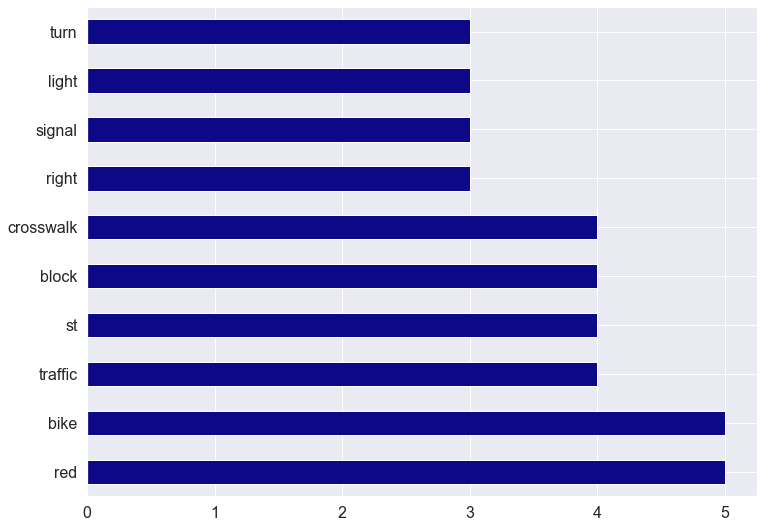

In [70]:
document_term_matrix['total_count'].plot.barh(figsize = (12, 9), fontsize = 16, colormap = 'plasma')